In [251]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

| 컬럼명              | 설명                                                                 | 데이터 유형 / 카테고리 값                         |
|---------------------|----------------------------------------------------------------------|----------------------------------------------------|
| Age                 | 직원의 나이                                                          | 수치형 (예: 18 ~ 60)                               |
| Attrition           | 직원의 퇴사 여부 (Yes: 퇴사함, No: 재직 중)                          | Yes, No                                            |
| BusinessTravel      | 출장 빈도                                                             | Travel_Rarely, Travel_Frequently, Non-Travel       |
| DailyRate           | 하루 급여 (사내 급여 시스템에 기반한 값)                             | 수치형                                              |
| Department          | 소속 부서                                                             | Sales, Research & Development, Human Resources     |
| DistanceFromHome    | 집에서 직장까지 거리                                                  | 수치형 (단위: 마일 또는 km)                        |
| Education           | 교육 수준 (1: Below College ~ 5: Doctor)                             | 1, 2, 3, 4, 5                                      |
| EducationField      | 전공 분야                                                             | Life Sciences, Medical, Marketing, Technical Degree, Human Resources, Other |
| EmployeeCount       | 직원 수 (항상 1로 고정)                                               | 1                                                  |
| EmployeeNumber      | 직원 고유 번호                                                        | 고유 식별자 (수치형)                               |
| EnvironmentSatisfaction | 근무 환경 만족도 (1: Low ~ 4: Very High)                       | 1, 2, 3, 4                                          |
| Gender              | 성별                                                                  | Male, Female                                       |
| HourlyRate          | 시급                                                                  | 수치형                                              |
| JobInvolvement      | 직무 몰입도 (1: Low ~ 4: Very High)                                   | 1, 2, 3, 4                                          |
| JobLevel            | 직급 단계 (1: 낮음 ~ 5: 높음)                                         | 1, 2, 3, 4, 5                                      |
| JobRole             | 직무 역할                                                             | Sales Executive, Research Scientist, Laboratory Technician, etc. |
| JobSatisfaction     | 직무 만족도 (1: Low ~ 4: Very High)                                   | 1, 2, 3, 4                                          |
| MaritalStatus       | 혼인 여부                                                             | Single, Married, Divorced                         |
| MonthlyIncome       | 월급                                                                  | 수치형                                              |
| MonthlyRate         | 월급여 시스템 상의 값                                                 | 수치형                                              |
| NumCompaniesWorked  | 이전에 근무한 회사 수                                                 | 수치형                                              |
| Over18              | 18세 이상 여부 (모든 값이 Y로 동일)                                  | Y                                                  |
| OverTime            | 초과근무 여부                                                         | Yes, No                                            |
| PercentSalaryHike   | 연봉 인상률 (%)                                                       | 수치형                                              |
| PerformanceRating   | 성과 등급 (1: Low ~ 4: Outstanding)                                   | 1, 2, 3, 4                                          |
| RelationshipSatisfaction | 인간관계 만족도 (1: Low ~ 4: Very High)                   | 1, 2, 3, 4                                          |
| StandardHours       | 표준 근무 시간 (모든 값이 80으로 동일)                              | 80                                                 |
| StockOptionLevel    | 스톡옵션 수준 (0: 없음 ~ 3: 높음)                                    | 0, 1, 2, 3                                         |
| TotalWorkingYears   | 총 근무 경력(년)                                                      | 수치형                                              |
| TrainingTimesLastYear | 작년 사내 교육 횟수                                               | 수치형                                              |
| WorkLifeBalance     | 일과 삶의 균형 (1: Bad ~ 4: Best)                                     | 1, 2, 3, 4                                          |
| YearsAtCompany      | 현재 회사에서 근무한 년 수                                            | 수치형                                              |
| YearsInCurrentRole  | 현재 직무를 맡은 기간(년)                                             | 수치형                                              |
| YearsSinceLastPromotion | 마지막 승진 이후 경과 기간(년)                                 | 수치형                                              |
| YearsWithCurrManager | 현 매니저와 함께한 기간(년)                                         | 수치형                                              |


In [252]:
# 01. 데이터 수집 및 로딩
df = pd.read_csv('data/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [253]:
# 02. 데이터 구조 및 변수 이해
# - 데이터 목적 파악, Feature/Target 구분

print(df.shape, end='\n\n') # 1470, 35
print(df.dtypes, end='\n\n') # 변수 타입 확인 (수치형/범주형 등)
df.info() # - 크기, 컬럼명, 샘플확인

(1470, 35)

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWor

In [254]:
# 03. 데이터 요약 및 기술통계
display(df.describe()) # 수치형

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [255]:
# 범주형 데이터 value_counts()
display(df.describe(include='object')) # 범주형
print(df.value_counts('Attrition'), end='\n\n')         # 퇴사여부
print(df.value_counts('BusinessTravel'), end='\n\n')    # 출장빈도
print(df.value_counts('EducationField'), end='\n\n')    # 전공분야
print(df.value_counts('Gender'), end='\n\n')            # 성별
print(df.value_counts('JobRole'), end='\n\n')           # 직무역할
print(df.value_counts('MaritalStatus'), end='\n\n')     # 혼인여부
print(df.value_counts('Over18'), end='\n\n')            # 18세이상 여부
print(df.value_counts('OverTime'), end='\n\n')          # 초과근무 여부

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


Attrition
No     1233
Yes     237
Name: count, dtype: int64

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

Gender
Male      882
Female    588
Name: count, dtype: int64

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

Over18
Y    1470
Name: count, dtype: int64

OverTime
No     1054
Yes     416
Name: count, dtype: int64



In [256]:
# 04. 결측치, 이상치 탐지
print(df.isna().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

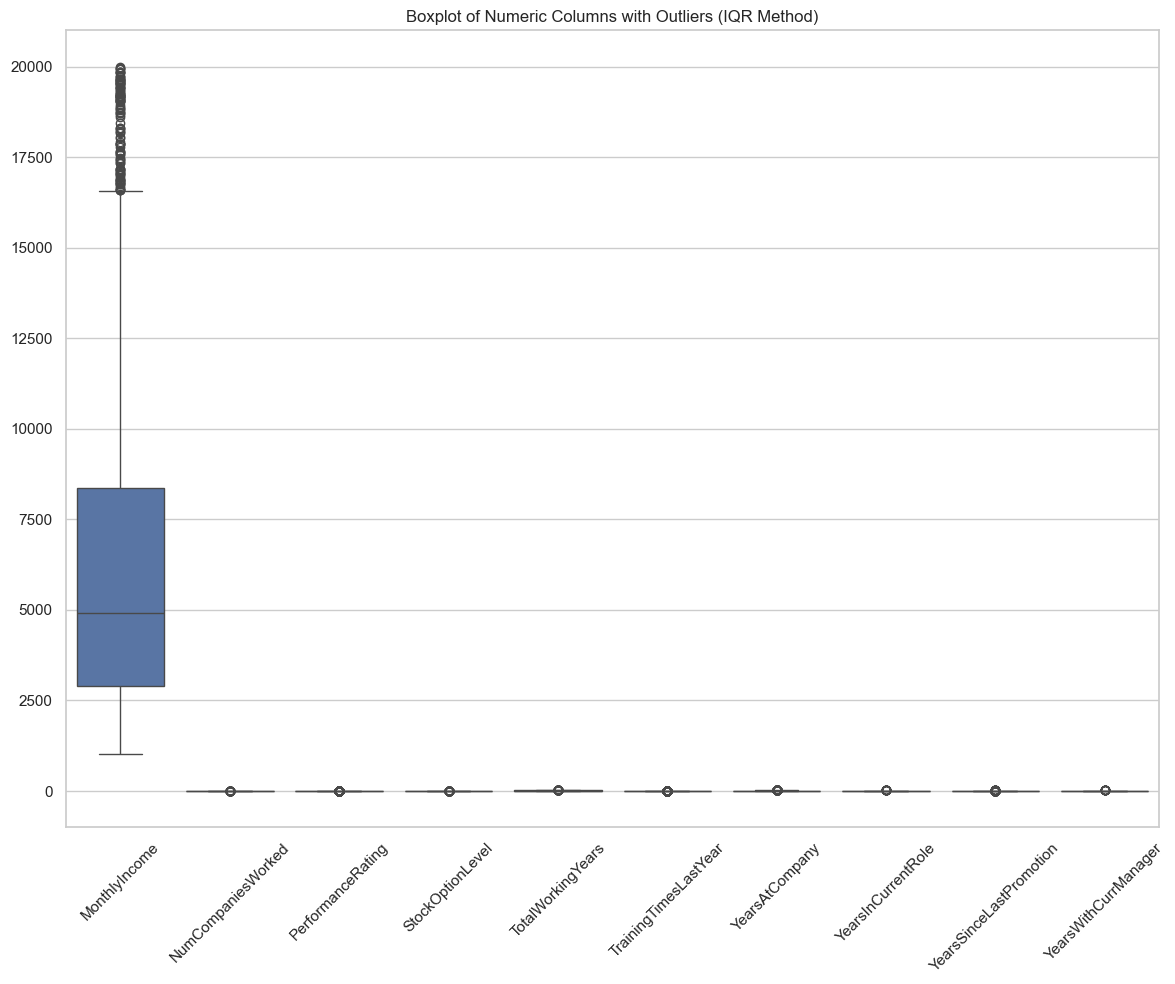

In [257]:
# 수치형 컬럼만 선택
numeric_df = df.select_dtypes(include=[np.number])

# IQR 계산
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# 이상치 마스크
is_outlier = (numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))

# 이상치가 있는 컬럼만 선택
outlier_cols = numeric_df.columns[is_outlier.any()]

# 이상치 포함 컬럼만 세로 방향 Boxplot
plt.figure(figsize=(12, 10))
sns.boxplot(data=numeric_df[outlier_cols])  # orient='v' 또는 생략 (기본값이 vertical)
plt.xticks(rotation=45)
plt.title("Boxplot of Numeric Columns with Outliers (IQR Method)")
plt.tight_layout()
plt.show()

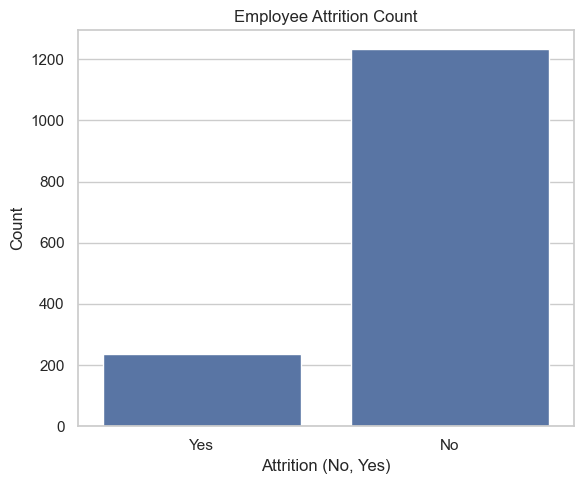

In [258]:
#퇴사율
import seaborn as sns
import matplotlib.pyplot as plt

# 이직 여부 카운트 시각화
plt.figure(figsize=(6, 5))
sns.countplot(x='Attrition', data=df)
plt.title("Employee Attrition Count")
plt.xlabel("Attrition (No, Yes)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


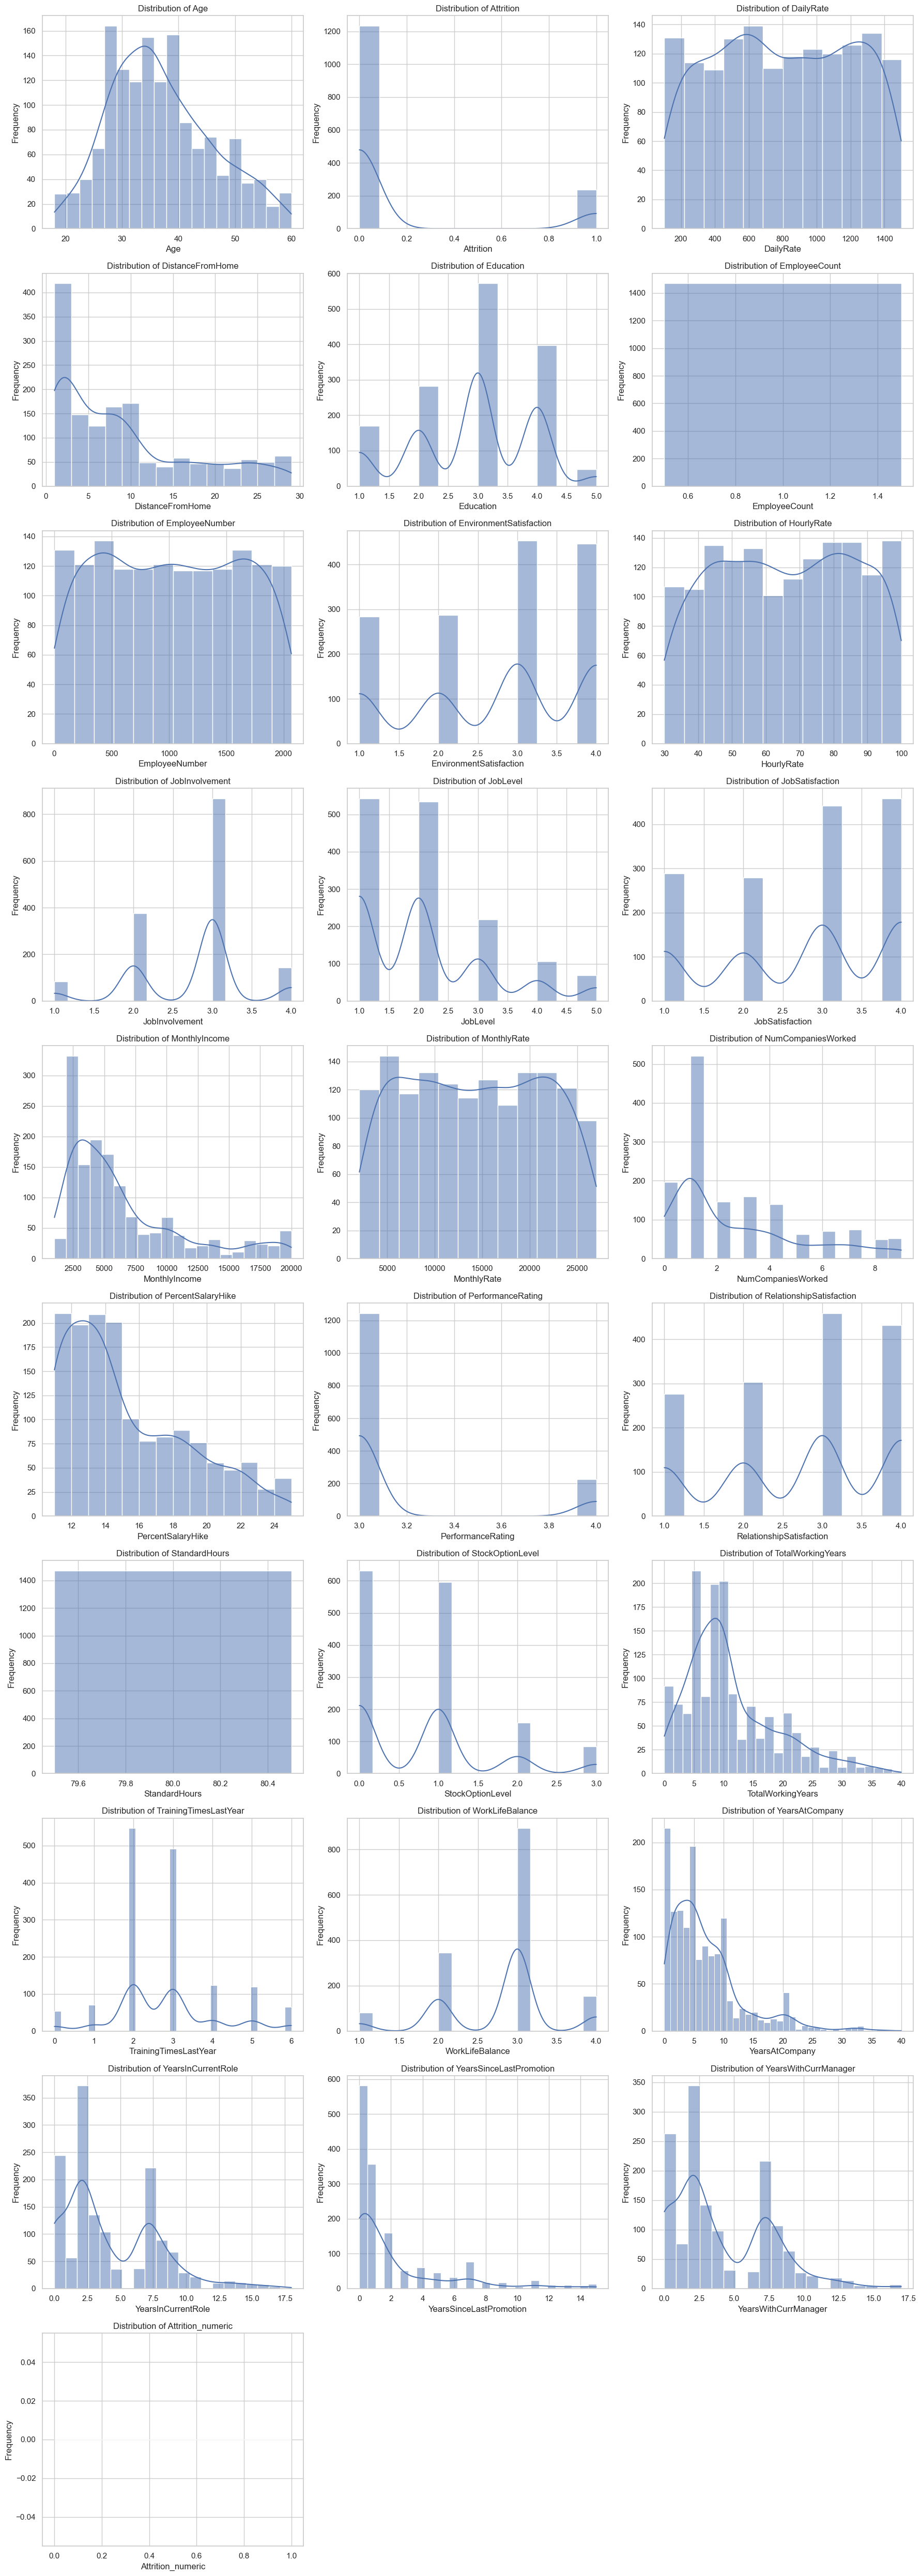

In [265]:
# 수치형 변수 추출
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# 시각화 스타일 설정
sns.set(style='whitegrid')

# subplot 설정 (한 줄에 3개씩)
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))

# 각 수치형 변수에 대해 히스토그램 + KDE 그리기
for i, col in enumerate(numerical_cols):
    ax = axes[i // n_cols, i % n_cols]                      # subplot 위치 계산
    sns.histplot(df[col], kde=True, ax=ax)                 # 히스토그램 + 커널 밀도 곡선
    ax.set_title(f'Distribution of {col}')                 # 제목 설정
    ax.set_xlabel(col)                                     # x축 레이블
    ax.set_ylabel('Frequency')                             # y축 레이블

# 빈 subplot 제거
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j // n_cols, j % n_cols])

# 그래프 간 간격 조정
plt.tight_layout()
plt.show()

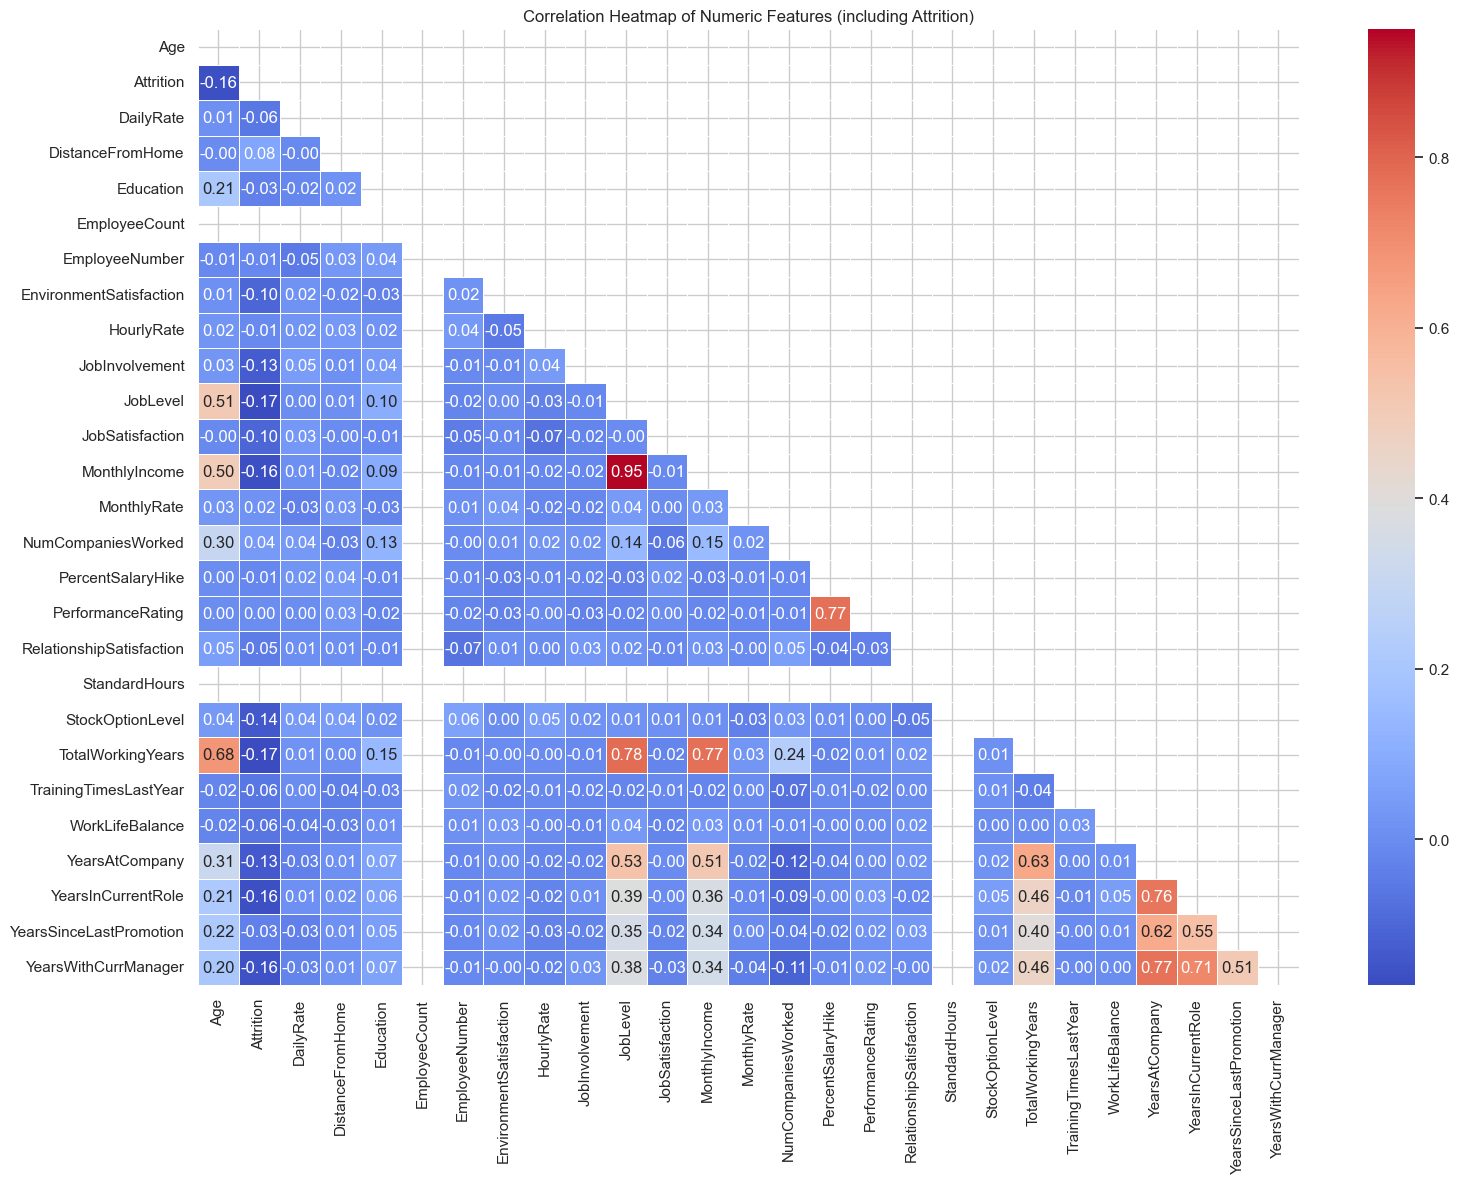

In [259]:
# 'Attrition'을 숫자로 변환 (Yes: 1, No: 0)
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# 수치형 변수만 선택
numeric_df = df.select_dtypes(include=[np.number])

# 상관계수 행렬 계산
corr_matrix = numeric_df.corr()

# 상삼각형 마스크 생성
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# 시각화
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix,
            mask=mask,
            cmap='coolwarm',
            annot=True,
            fmt=".2f",
            linewidths=0.5)

plt.title("Correlation Heatmap of Numeric Features (including Attrition)")
plt.tight_layout()
plt.show()

# 상관계수 절댓값 ≥ 0.6인 변수 쌍 목록 (영문컬럼명(한글컬럼명) 기준)
# MonthlyIncome(월급) ↔ JobLevel(직급): 0.9503
# PerformanceRating(PerformanceRating) ↔ PercentSalaryHike(연봉인상률): 0.7736
# TotalWorkingYears(총 경력 연수) ↔ Age(나이): 0.6804
# TotalWorkingYears(총 경력 연수) ↔ JobLevel(직급): 0.7822
# TotalWorkingYears(총 경력 연수) ↔ MonthlyIncome(월급): 0.7729

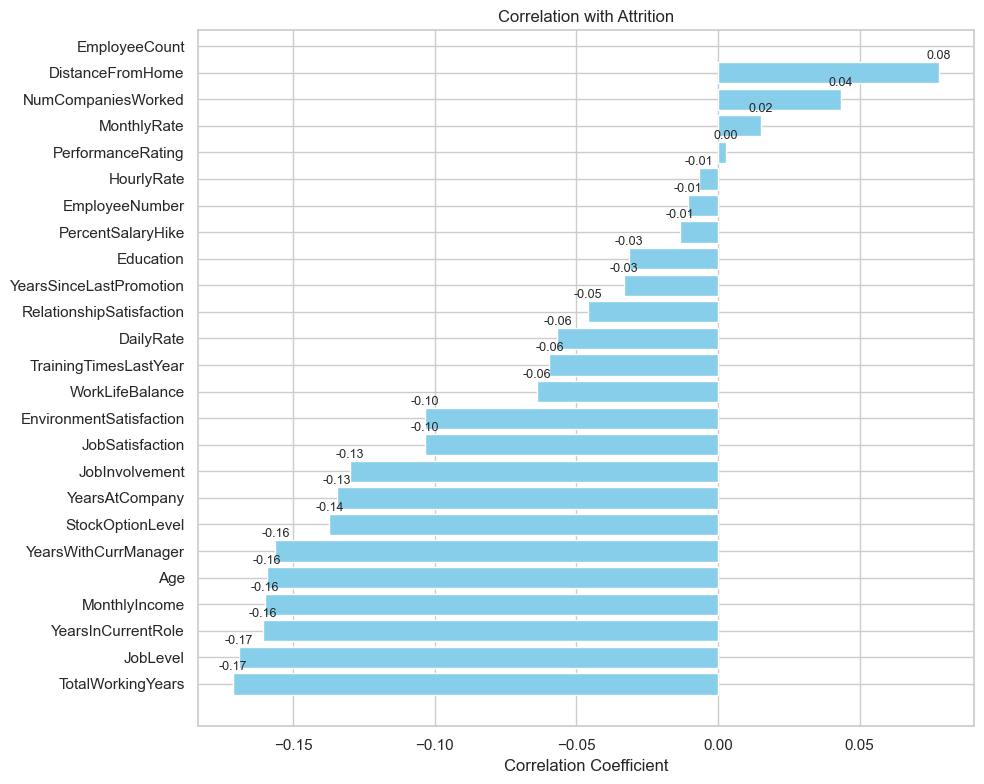

In [260]:
import matplotlib.pyplot as plt

# Attrition 기준 상관계수 계산 및 정렬
attrition_corr = numeric_df.corr()['Attrition'].drop('Attrition').sort_values()

# 바플롯
plt.figure(figsize=(10, 8))
bars = plt.barh(attrition_corr.index, attrition_corr.values, color='skyblue')
plt.title('Correlation with Attrition')
plt.xlabel('Correlation Coefficient')
plt.grid(True)

# 수치 값을 막대 바로 위에 표시
for bar in bars:
    width = bar.get_width()
    x = width
    y = bar.get_y() + bar.get_height()
    plt.text(x, y, f'{width:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


C:\Users\Playdata2\AppData\Local\Temp\ipykernel_13024\4064652133.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # x축 값이 겹치지 않도록 45도 회전
C:\Users\Playdata2\AppData\Local\Temp\ipykernel_13024\4064652133.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # x축 값이 겹치지 않도록 45도 회전
C:\Users\Playdata2\AppData\Local\Temp\ipykernel_13024\4064652133.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # x축 값이 겹치지 않도록 45도 회전
C:\Users\Playdata2\AppData\Local\Temp\ipykernel_13024\4064652133.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. aft

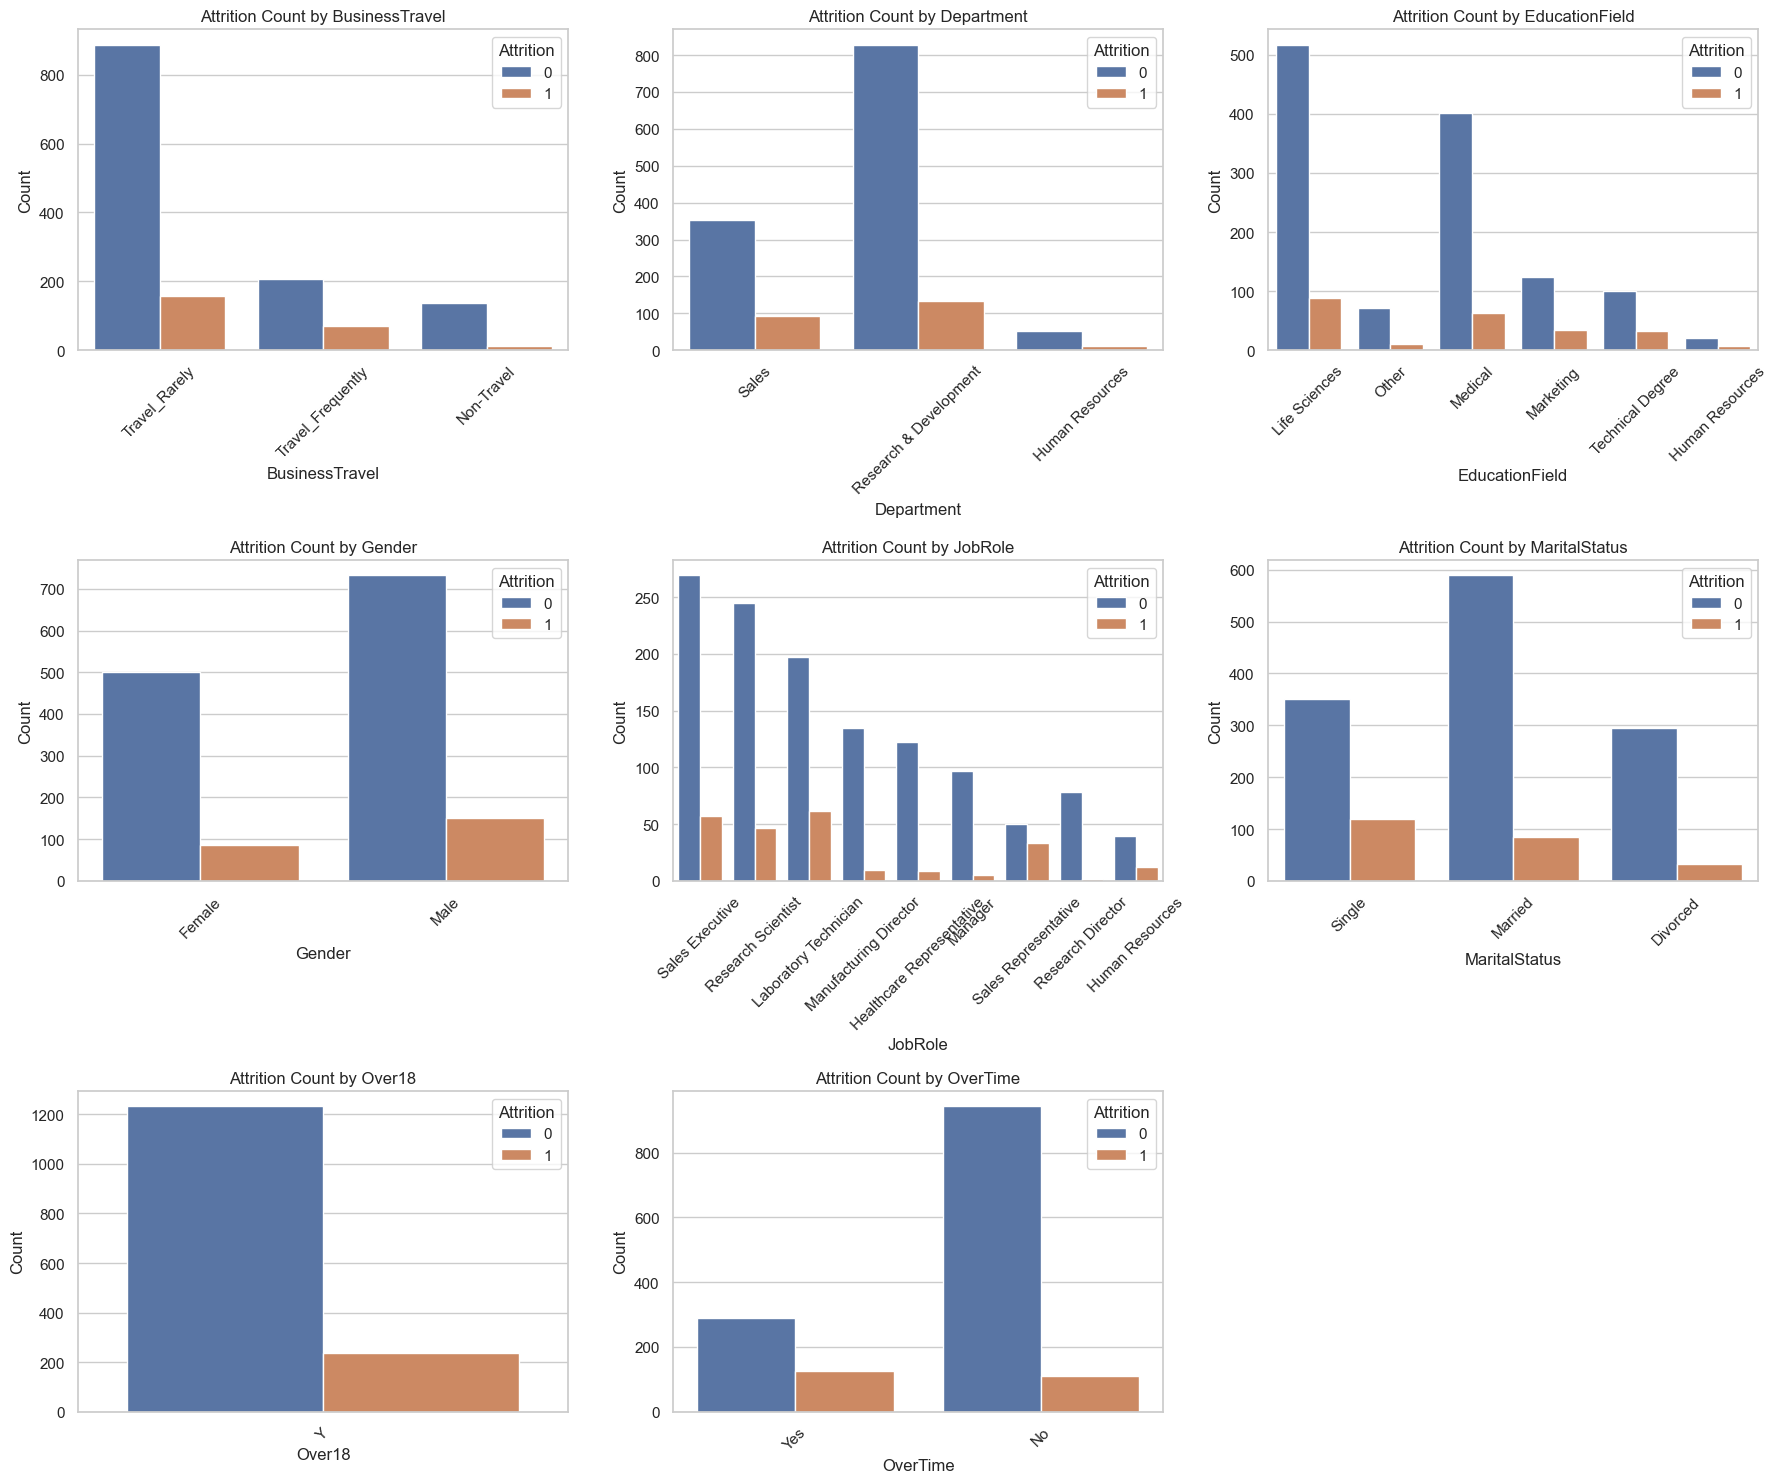

In [264]:
# 범주형 변수 목록 추출 (object 타입 컬럼)
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# seaborn 스타일 설정 (배경 흰색 격자 스타일)
sns.set(style='whitegrid')

# subplot 구조 설정 (한 줄에 3개씩, 전체 범주 수에 맞게 행 자동 계산)
n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols  # 올림 계산
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))  # 전체 subplot 크기 지정

# 각 범주형 변수에 대해 반복하면서 countplot 생성
for i, col in enumerate(categorical_cols):
    ax = axes[i // n_cols, i % n_cols]                      # subplot의 위치 계산
    sns.countplot(x=col, hue='Attrition', data=df, ax=ax)  # 이직여부(Attrition)를 기준으로 countplot 생성
    ax.set_title(f'Attrition Count by {col}')              # 그래프 제목 설정
    ax.set_xlabel(col)                                     # x축 레이블 설정
    ax.set_ylabel('Count')                                 # y축 레이블 설정
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # x축 값이 겹치지 않도록 45도 회전

# 사용하지 않는 subplot(빈 칸)이 있다면 삭제
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j // n_cols, j % n_cols])

# 전체 레이아웃 자동 정리 (겹침 방지)
plt.tight_layout()

# 최종 그래프 출력
plt.show()